<a href="https://colab.research.google.com/github/Nirnaya1/ML-LAB-102217259/blob/main/ML_Assignment7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###1. Implement the K-Means algorithm for clustering the dataset given at the following link after omitting the last attribute:

https://drive.google.com/file/d/1O_NwpJT-8xGfU_-3llUl2sgPu0xllOrX/view

In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

In [ ]:
files.upload()

Saving USA_Housing.csv to USA_Housing.csv


{'USA_Housing.csv': b'Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price\r\n79545.45857,5.682861322,7.009188143,4.09,23086.8005,1059033.558\r\n79248.64245,6.002899808,6.730821019,3.09,40173.07217,1505890.915\r\n61287.06718,5.86588984,8.51272743,5.13,36882.1594,1058987.988\r\n63345.24005,7.188236095,5.586728665,3.26,34310.24283,1260616.807\r\n59982.19723,5.040554523,7.839387785,4.23,26354.10947,630943.4893\r\n80175.75416,4.988407758,6.104512439,4.04,26748.42842,1068138.074\r\n64698.46343,6.025335907,8.147759585,3.41,60828.24909,1502055.817\r\n78394.33928,6.989779748,6.620477995,2.42,36516.35897,1573936.564\r\n59927.66081,5.36212557,6.393120981,2.3,29387.396,798869.5328\r\n81885.92718,4.42367179,8.167688003,6.1,40149.96575,1545154.813\r\n80527.47208,8.093512681,5.0427468,4.1,47224.35984,1707045.722\r\n50593.6955,4.496512793,7.467627404,4.49,34343.99189,663732.3969\r\n39033.80924,7.671755373,7.250029317,3.1,39220.36147,1042814

In [ ]:
df=pd.read_csv('USA_Housing.csv')
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05


In [ ]:
scaler=MinMaxScaler()
dataFrame_scaled=scaler.fit_transform(df)
dataFrame_scaled=pd.DataFrame(dataFrame_scaled,columns=df.columns)
dataFrame_scaled.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,0.686822,0.441986,0.501502,0.464444,0.329942,0.425210
1,0.683521,0.488538,0.464501,0.242222,0.575968,0.607369
2,0.483737,0.468609,0.701350,0.695556,0.528582,0.425192
3,0.506630,0.660956,0.312430,0.280000,0.491549,0.507384
4,0.469223,0.348556,0.611851,0.495556,0.376988,0.250702


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dataFrame_scaled[['Avg. Area Income',	'Avg. Area House Age',	'Avg. Area Number of Rooms',	'Avg. Area Number of Bedrooms',	'Area Population']], dataFrame_scaled[['Price']], test_size=0.33, random_state=0)

In [ ]:
X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

In [ ]:
kmeans = KMeans(n_clusters = 3, random_state = 0, n_init='auto')
kmeans.fit(X_train_norm)

KMeans(n_clusters=3, random_state=0)

In [ ]:
silhouette_score(X_train_norm, kmeans.labels_, metric='euclidean')

0.22142977298199173

In [ ]:
K = range(2, 8)
fits = []
score = []


for k in K:
    model = KMeans(n_clusters = k, random_state = 0, n_init='auto').fit(X_train_norm)
    fits.append(model)
    score.append(silhouette_score(X_train_norm, model.labels_, metric='euclidean'))

<Axes: >

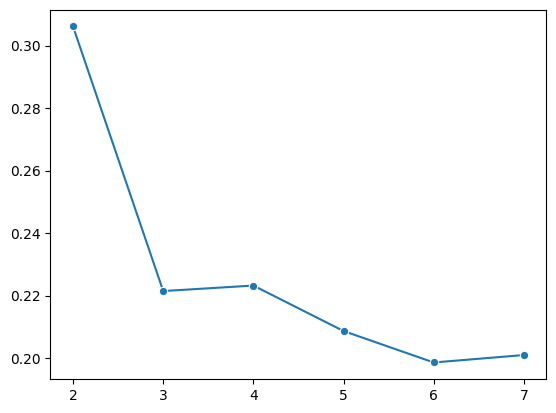

In [ ]:
sns.lineplot(x = K, y = score, marker = 'o')

In [ ]:
kmeans = KMeans(n_clusters = 3, random_state = 0, n_init='auto')

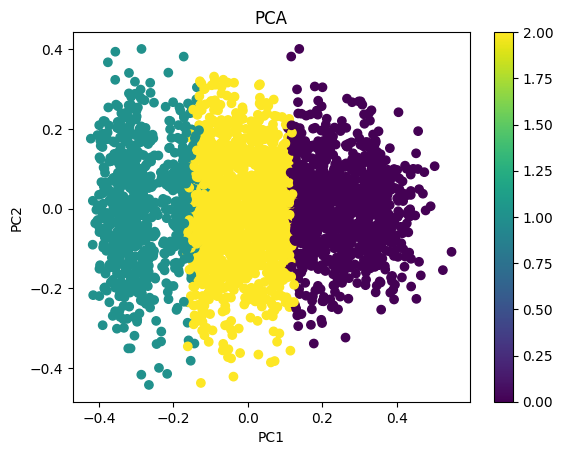

In [ ]:
pca = PCA(n_components = 2)
X_pca=pca.fit_transform(X_train_norm)

y_labels=kmeans.fit_predict(X_train_norm)

plt.scatter(X_pca[:,0],X_pca[:,1],c=y_labels)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA')
plt.colorbar()
plt.show()

###Implement the K-Medoids algorithm for clustering the dataset given at the above specified link.

  Note: Converge these algorithms by using SSE. Use elbow method to find the appropriate values of K

In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn_extra.cluster import KMedoids
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

In [ ]:
df=pd.read_csv('USA_Housing.csv')
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05


In [ ]:
scaler=MinMaxScaler()
dataFrame_scaled=scaler.fit_transform(df)
dataFrame_scaled=pd.DataFrame(dataFrame_scaled,columns=df.columns)
dataFrame_scaled.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,0.686822,0.441986,0.501502,0.464444,0.329942,0.425210
1,0.683521,0.488538,0.464501,0.242222,0.575968,0.607369
2,0.483737,0.468609,0.701350,0.695556,0.528582,0.425192
3,0.506630,0.660956,0.312430,0.280000,0.491549,0.507384
4,0.469223,0.348556,0.611851,0.495556,0.376988,0.250702


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dataFrame_scaled[['Avg. Area Income',	'Avg. Area House Age',	'Avg. Area Number of Rooms',	'Avg. Area Number of Bedrooms',	'Area Population']], dataFrame_scaled[['Price']], test_size=0.33, random_state=0)

In [ ]:
X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

In [ ]:
kmedoids = KMedoids(n_clusters=3, random_state=42)
labels = kmedoids.fit_predict(X_train_norm)

In [ ]:
silhouette_score(X_train_norm, labels, metric='euclidean')

0.20381772562481912

In [ ]:
K = range(2, 8)
fits = []
score = []


for k in K:
    model = KMedoids(n_clusters = k, random_state = 42).fit(X_train_norm)
    fits.append(model)
    score.append(silhouette_score(X_train_norm, model.labels_, metric='euclidean'))

<Axes: >

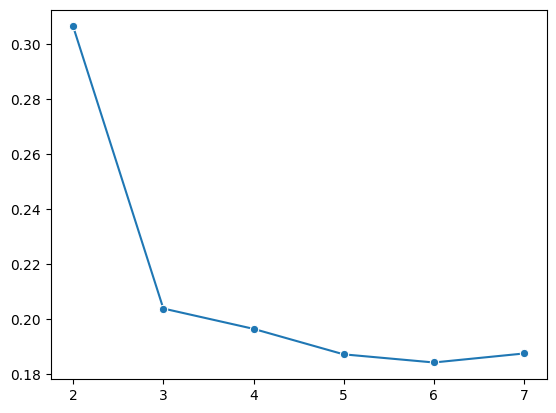

In [ ]:
sns.lineplot(x = K, y = score, marker = 'o')

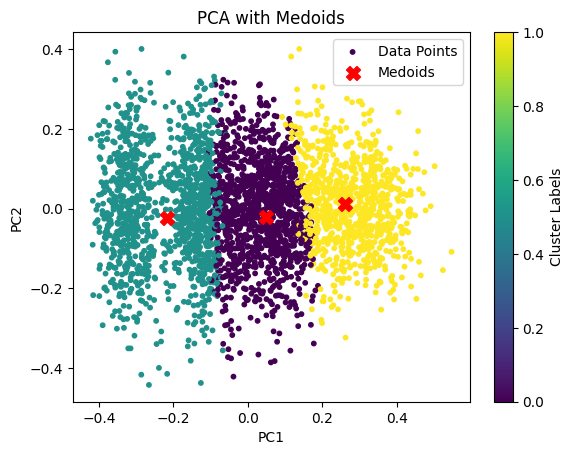

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_norm)

kmedoid = KMedoids(n_clusters=3, random_state=42)
y_labels = kmedoid.fit_predict(X_train_norm)

medoid_points = pca.transform(kmedoid.cluster_centers_)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_labels, cmap='viridis', s=10, label='Data Points')
plt.scatter(medoid_points[:, 0], medoid_points[:, 1], c='red', marker='X', s=100, label='Medoids')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA with Medoids')
plt.colorbar(label='Cluster Labels')
plt.legend()
plt.show()